<a href="https://colab.research.google.com/github/Jeansds/Curso_Udemy---Deep-Learning-com-Python-de-A-a-Z/blob/master/Tarefa_13_Detec%C3%A7%C3%A3o_outliers_Bart_Homer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install minisom
from minisom import MiniSom
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pylab import pcolor, colorbar, plot
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
base = pd.read_csv('/content/sample_data/original.csv')
X = base.iloc[:, 0: 6].values
y = base.iloc[:, 6].values
labelenconder = LabelEncoder()
y = labelenconder.fit_transform(y)#transforma os nomes em numeros na ordem crescente iniciando de 0
normalizador = MinMaxScaler(feature_range = (0, 1))
X = normalizador.fit_transform(X)

In [3]:
print(y)
print('*'*100)
print(X)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
****************************************************************************************************
[[0.35231348 0.19711995 0.32096694 0.         0.         0.01280093]
 [0.25606564 0.1795626  0.21617233 0.         0.         0.00671489]
 [0.26935365 0.28366032 0.06129067 0.         0.         0.03082025]
 ...
 [0.         0.         0.         0.         0.48359639 0.01560842]
 [0.         0.        

In [0]:
som = MiniSom(x = 9, y = 9, input_len = 6, random_seed = 0)#pegando sigma e learning rate default
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

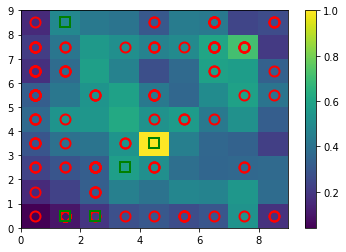

In [5]:
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
color = ['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
        markerfacecolor = 'None', markersize = 10,
        markeredgecolor = color[y[i]], markeredgewidth = 2)#posiciona o simbolo no meio do quadrado

In [0]:
mapeamento = som.win_map(X)
suspeitos = np.concatenate((mapeamento[(4, 3)], mapeamento[(7, 7)]), axis = 0)
suspeitos = normalizador.inverse_transform(suspeitos)

classe = []
index = []
for i in range(len(base)):
  for j in range(len(suspeitos)):
    Cont = 0
    for k in range(len(suspeitos[j])):
      if round(suspeitos[j, k],2) == round(base.iloc[i, k],2):
        Cont += 1
    if Cont == 6:
      classe.append(base.iloc[i, 6])
      index.append(i)
      break
#for i, values in enumerate(classe):
#  if values == ''
classe = labelenconder.fit_transform(classe)
classe = np.asarray(classe)

In [9]:
print(len(suspeitos), len(classe))

17 17


In [10]:
suspeitos_final = np.column_stack((suspeitos, classe))
suspeitos_final = suspeitos_final[suspeitos_final[:, 6].argsort()]
print(suspeitos_final, index)

[[2.4876933e+00 0.0000000e+00 0.0000000e+00 1.6958948e+01 9.7940105e-01
  2.3499765e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.4074794e+01 1.8290632e+00
  2.1350932e+00 0.0000000e+00]
 [2.4510260e+00 8.5598725e-01 0.0000000e+00 1.0303880e+01 1.3769895e+00
  2.1121814e+00 0.0000000e+00]
 [1.8744326e+00 1.8095732e+00 1.4282935e+00 1.1283195e+01 1.0321888e+00
  7.7321500e-01 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 2.1512486e+01 3.0598493e+00
  4.9179544e+00 0.0000000e+00]
 [4.3221135e+00 5.9376430e+00 4.6265936e+00 0.0000000e+00 0.0000000e+00
  3.8478266e-02 1.0000000e+00]
 [1.1887306e+01 6.8667300e+00 3.0174108e+00 0.0000000e+00 0.0000000e+00
  1.5068060e-01 1.0000000e+00]
 [1.1095816e+01 4.5251110e+00 4.4286838e+00 0.0000000e+00 0.0000000e+00
  1.6770024e-02 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.3390434e+01 1.2085830e+00
  1.5497772e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.3434466e+01 2.5802839e+00
 